In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from IPython.display import display, HTML

def configure_plotly_browser_state():
  """
  Configures Plotly to render in a Jupyter Notebook environment.

  This function is necessary for Plotly plots to display correctly in a Jupyter Notebook.
  It initializes the notebook mode for Plotly and potentially executes some JavaScript
  code to enable the rendering process.

  Note: Depending on your Plotly version and environment, this function may not be necessary or may require different code.
  """
  display(HTML('<script src="/static/components/requirejs/require.js"></script>'))
  display(HTML('''
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

1. Bank of America
2. CitiGroup
3. Goldman Sachs
4. JPMorgan Chase
5. Morgan Stanley
6. Wells Fargo

In [2]:
  #figure out how to get stock data from jan 1st 2006 to jan 1st 2016 for each of these banks. each bank is a seperate dataframe with variable name for that bank being its ticker symbol
  start = pd.to_datetime('2006-01-01')
  end = pd.to_datetime('2016-01-01')

In [3]:
BAC = data.DataReader('BAC','stooq',start,end)

In [4]:
C = data.DataReader('C','stooq',start,end)

In [5]:
JPM = data.DataReader('JPM','stooq',start,end)

In [6]:
WFS = data.DataReader('WFC','stooq',start,end)

In [7]:
MS = data.DataReader('MS', 'stooq', start, end)

In [8]:
GS = data.DataReader('GS', 'stooq', start, end)

In [9]:
tickers = ['BAC','C','GS','JPM','MS','WFS']

In [10]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFS],axis=1,keys=tickers)

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [12]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFS                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

In [13]:
#max close price for each banks stock
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFS     47.0925
dtype: float64

In [14]:
returns = pd.DataFrame()
returns

""


In [15]:
for tick in tickers:
  print(tick)

BAC
C
GS
JPM
MS
WFS


In [16]:
for tick in tickers:
  returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [17]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFS Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


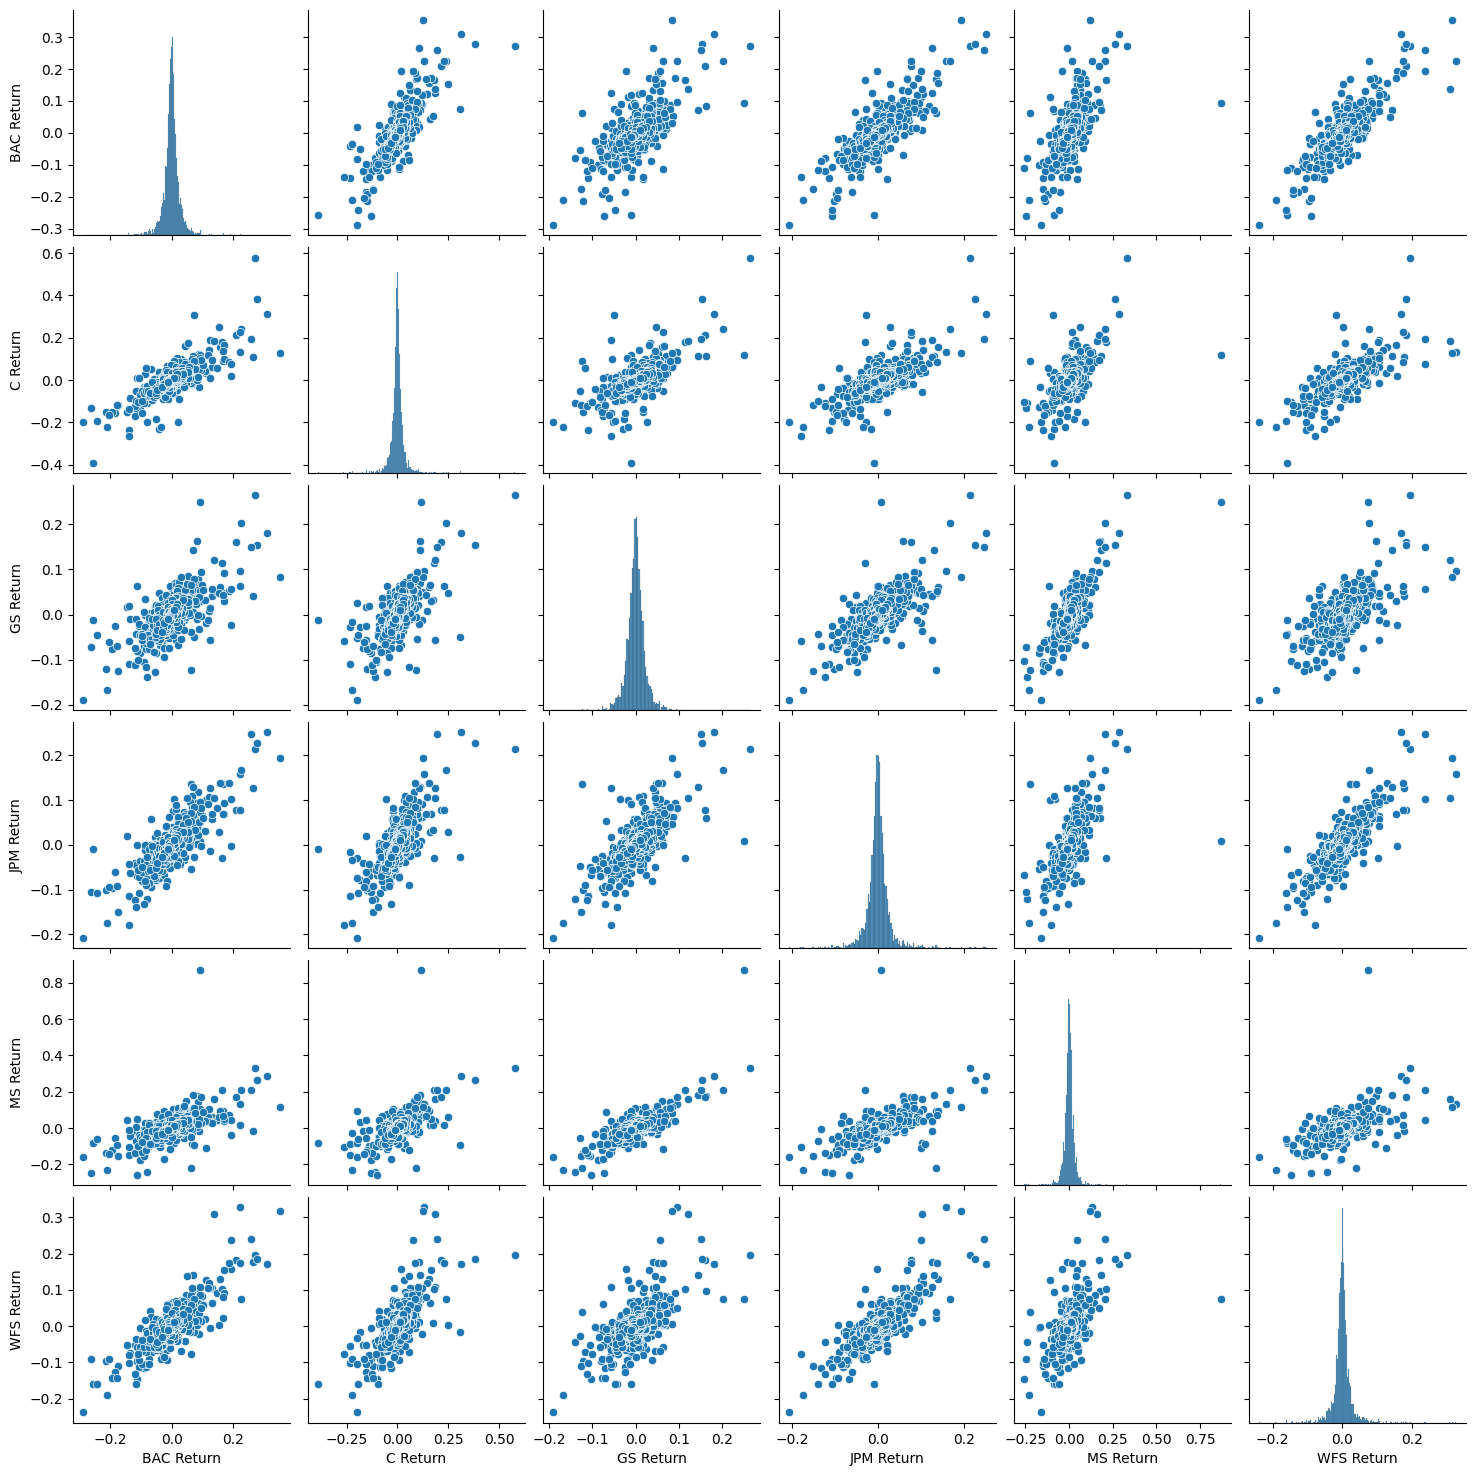

In [18]:
import seaborn as sns
sns.pairplot(returns[1:])

In [19]:
returns.drop('2006-01-03',inplace=True)

In [29]:
close_all_banks = bank_stocks.xs(key='Close',axis=1,level='Stock Info')

<Axes: xlabel='Date'>

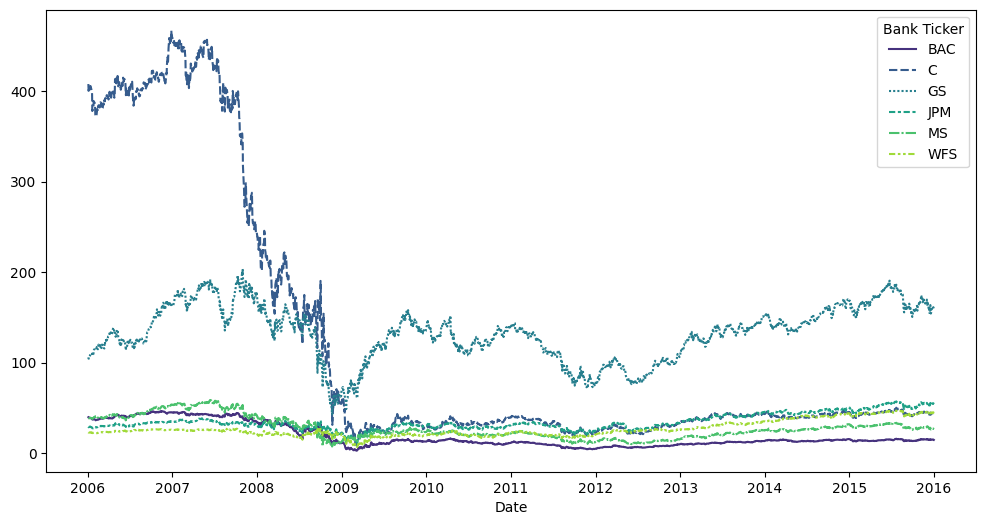

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=close_all_banks,palette='viridis',ls='-',lw=1.5)

In [30]:
from plotly.offline import iplot,init_notebook_mode
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objs as go

<Axes: xlabel='Date'>

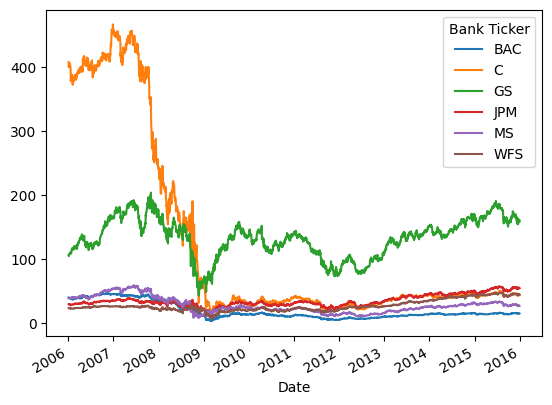

In [34]:
# configure_plotly_browser_state()
close_all_banks.plot()

In [26]:
bac15 = BAC[['Open','High','Low','Close']].loc[BAC.index >= pd.to_datetime('2015-01-01')]

In [27]:
bac15.index

DatetimeIndex(['2015-12-31', '2015-12-30', '2015-12-29', '2015-12-28',
               '2015-12-24', '2015-12-23', '2015-12-22', '2015-12-21',
               '2015-12-18', '2015-12-17',
               ...
               '2015-01-15', '2015-01-14', '2015-01-13', '2015-01-12',
               '2015-01-09', '2015-01-08', '2015-01-07', '2015-01-06',
               '2015-01-05', '2015-01-02'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [ ]:
configure_plotly_browser_state()
MS['Close'].loc[MS.index >= pd.to_datetime('2015-01-01')].ta_plot(study='sma',periods=[13,21,55])

In [ ]:
configure_plotly_browser_state()
BAC['Close'].loc[BAC.index >= pd.to_datetime('2015-01-01')].ta_plot(study='boll')